In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Homework 02

## Problem 1: Ideal Gas Thermodynamics

The molar enthalpy may be expressed as a function of temperature and pressure $H = H(T, P)$:

$$ dH = \bigg( \frac{\partial H}{\partial T} \bigg)_P dT + \bigg( \frac{\partial H}{\partial P} \bigg)_T dP $$

For any constant-pressure process, we can simplify this expression to:
$$ dH = C_P dT $$ 

where $C_P$ is the heat capacity of the gas. The temperature dependence of the heat capacity of a gas is given by the empirical equation:

$$ \frac{C_P}{R} = A + BT + CT^2 + DT^{-2} $$

Finally, for a mechanically-reversible, constant-pressure, closed system process we can relate the steady flow heat transfer, $Q$, to the enthalpy and heat capacity by:

$$ Q = \Delta H = \int_{T_1}^{T_2} C_P dT $$

#### Calculate the heat required to raise the temperature of 1 mol of propane from 260$^\circ$C to 600$^\circ$C in a steady-flow heat process. Assume the pressure is sufficiently low that propane may be considered an ideal gas. The parameters for the temperature dependence of the heat capacity are given below.

In [ ]:
data = {'A': 1.213,
       'B': 28.785*10**-3,
       'C': -8.824*10**-6,
       'D': 0.0}

In [ ]:
from scipy.integrate import quad

R = 8.314 # J/mol/K
def integrand(T, data):
  return R * (data['A'] + data['B'] * T + data['C'] * T**2 + data['D'] * T**(-2))

T1 = 260 + 273.15 # K
T2 = 600 + 273.15 # K

integral, err = quad(integrand, T1, T2, args=(data,))
print("Heat required: {} J/mol".format(integral))

Heat required: 48070.20378399197 J/mol


#### Calculate the final temperature $T_2$ when heat in the amount of 37 kJ/mol is added to 1 mol of Hydrogen sulfide  initially at 260$^\circ$C in a steady-flow process at 1 atm. Hydrogen sulfide may be treated as an ideal gas. The parameters for the temperature dependence of the heat capacity are given below.

In [ ]:
data = {'A': 3.931,
       'B': 1.490*10**-3,
       'C': 0.0,
       'D': -0.232*10**5}

In [ ]:
from scipy.optimize import fsolve

T0 = 260 + 273.15 # K
dQ = 37 * 1000 # J/mol

def f(T1, data):
  integral, err = quad(integrand, T0, T1, args=(data,))
  return dQ - integral

sol = fsolve(f, x0=T0, args=(data,))
print("Final temperature: {} degC".format(sol[0]-273.15))

Final temperature: 1096.9713085014278 degC


## Problem 2: Equilibrium Concentrations of First-order, Reversible Reaction Systems

Consider the isomerization reactions:

$$ A \longleftrightarrow B \longleftrightarrow C $$

with forward reaction rates $k_1$  and $k_3$, respectively, as written; reverse reaction rates $k_2$ and $k_4$, as written. First order kinetics leads to the following system of ordinary differential equations:

$$ \frac{dc_A}{dt} = -k_1 c_A + k_2 c_B $$
$$ \frac{dc_B}{dt} = k_1 c_A - k_2 c_B - k_3 c_B + k_4 c_C $$
$$ \frac{dc_C}{dt} = k_3 c_B - k_4 c_C $$

We further assume the reactions occur in a isothermal, isobaric closed system and that we have reached steady-state such that $dc_i/dt$ = 0 for i = A, B, C. We add an additional equation for an overall mass balance on our system to reach the following set of linear equations:

$$ 0 = -k_1 c_A + k_2 c_B $$
$$ 0 = k_1 c_A - k_2 c_B - k_3 c_B + k_4 c_C $$
$$ 0 = k_3 c_B - k_4 c_C $$
$$ c_{A0} + c_{B0} + c_{C0} = c_A + c_B + c_C $$ 

In [ ]:
# Assume the following set of parameters:
k1 = 1 # /s 
k2 = 0 # /s
k3 = 2 # /s
k4 = 3 # /s
ca0 = 1 # mol/L
cb0 = 0 # mol/L
cc0 = 0 # mol/L

#### Cast the set of equations describing this reaction system into the form $Ax = b$. Print out the matrix $A$ and vector $b$.

In [ ]:
e1 = [-k1,k2,0]
e2 = [k1,-k2-k3,k4]
e3 = [0,k3,-k4]
e4 = [1,1,1]
A = np.stack([e1, e2, e3, e4], axis=0)
b = np.array([0,0,0,ca0+cb0+cc0])
print(A, b)

[[-1  0  0]
 [ 1 -2  3]
 [ 0  2 -3]
 [ 1  1  1]] [0 0 0 1]


#### Determine the equilibrium, steady-state concentrations $c_A$, $c_B$, and $c_C$. Hint: `np.linalg.solve` only works when $A$ is a square matrix. Try `np.linalg.lstsq` instead.

In [ ]:
x, res, rank, s = np.linalg.lstsq(A, b)
print("cA: {} mol/L; cB: {} mol/L; cC: {} mol/L".format(*list(x)))

cA: -7.563812542377768e-17 mol/L; cB: 0.5999999999999998 mol/L; cC: 0.3999999999999998 mol/L


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


## Problem 3: Flash Distillation

A liquid hydrocarbon mixture undergoes a <a href="https://en.wikipedia.org/wiki/Flash_evaporation">flash evaporation</a> to 3.4 bar and 65 $^\circ$C. The composition of the liquid feed stream ($X_i$) and the "K" value of each component at the flash condition are given in a table below. 

A material balance for component $i$ gives the equation:

$$ X_i = (1 - \phi) y_i + \phi x_i $$

where $X_i$ is the mole fraction in the liquid feed, $x_i$ is the mole fraction in the liquid product stream, $y_i$ is the mole fraction in the vapour product, and $\phi$ is the ratio of liquid product-to-feed molar flow rate. The definition of the equilibrium coefficient is $K_i = y_i/x_i$. We can eliminate $x_i$ from the material balance by introducing $K_i$ giving a single relation between $y_i$ and $X_i$:

$$ y_i = \frac{X_i}{1-\phi(1-\frac{1}{K_i})} $$

Since the $y_i$ must sum to 1, we have a nonlinear equation for $\phi$:

$$ f(\phi) = 1 - \sum_{i=1}^N \frac{X_i}{1-\phi(1-\frac{1}{K_i})} = 0 $$

#### Solve for the composition of the vapor ($y_i$) and liquid ($x_i$) streams in a flash distillation process and the fraction of feed leaving the flash as liquid.

In [ ]:
c2 = {'X_i': 0.0079, 'K_i': 16.2}
c3 = {'X_i': 0.1281, 'K_i': 5.2}
ic4 = {'X_i': 0.0849, 'K_i': 2.6}
nc4 = {'X_i': 0.2690, 'K_i': 1.98}
ic5 = {'X_i': 0.0589, 'K_i': 0.91}
nc5 = {'X_i': 0.1361, 'K_i': 0.72}
c6 = {'X_i': 0.3151, 'K_i': 0.28}

data = {'Ethane': c2,
       'Propane': c3,
       'iso-Butane': ic4,
       'n-Butane': nc4,
       'iso-Pentane': ic5,
       'n-Pentane': nc5,
       'Hexane': c6}

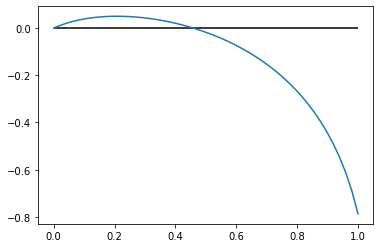

In [ ]:
def f(phi, data):
  sum = 0.
  for _, p in data.items():
    sum += p['X_i'] / (1 - phi * (1 - 1/p['K_i']))
  return 1 - sum

phi = np.linspace(0, 1)
plt.plot(phi, f(phi, data))
plt.hlines(0., 0., 1.0)

In [ ]:
x0 = 0.5
sol = fsolve(f, x0, args=(data,))
print("phi: {}".format(sol[0]))

phi: 0.45850881277671535


In [ ]:
y_i = np.array([p['X_i'] / (1 - sol[0] * (1 - 1/p['K_i'])) for _, p in data.items()])
x_i = np.array([y_i[i]/p['K_i'] for i, (_, p) in enumerate(data.items())])
print("y_i: {}".format(y_i))
print("x_i: {}".format(x_i))  

y_i: [0.01386465 0.2034412  0.11827136 0.34796723 0.05634493 0.11550451
 0.14460611]
x_i: [0.00085584 0.03912331 0.04548898 0.17574103 0.0619175  0.16042293
 0.51645041]


In [ ]:
import pandas as pd
d = {'name': list(data.keys()), 'x_i': x_i, 'y_i': y_i}
df = pd.DataFrame.from_dict(d)
print(df)

          name       x_i       y_i
0       Ethane  0.000856  0.013865
1      Propane  0.039123  0.203441
2   iso-Butane  0.045489  0.118271
3     n-Butane  0.175741  0.347967
4  iso-Pentane  0.061918  0.056345
5    n-Pentane  0.160423  0.115505
6       Hexane  0.516450  0.144606
